In [31]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
from sklearn.preprocessing import label_binarize

%pylab inline

# Set paths (Currently for GoogLeNet-384x288c244-finetuning)
MODEL_PATH    = '/home/reneoctavio/Downloads/digits-2.0-final/digits/digits/jobs/20160128-193319-9f2b/'
DATASET_PATH  = '/home/reneoctavio/Downloads/digits-2.0-final/digits/digits/jobs/20160128-180614-0b93/'
SNAPSHOT_PATH = '/home/reneoctavio/Downloads/digits-2.0-final/digits/digits/jobs/20160128-193319-9f2b/'
OUTPUT_PATH   = '/home/reneoctavio/Documents/Plantas/Caffe/GoogLeNet-384x288c244-finetuning/'

# Input Files
LABEL_FILE      = DATASET_PATH  + 'labels.txt'
PRED_TOP5_FILE  = OUTPUT_PATH + 'prediction-top-5-test.npy'
PRED_SCORE_FILE = OUTPUT_PATH + 'prediction-score-test.npy'
TRUE_LABEL_FILE = OUTPUT_PATH + 'true-label-test.npy'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
# Read Labels
label_file = open(LABEL_FILE, 'r')
label_dic = {}
idx = 0
for line in label_file:
    line = line.rsplit('\n')[0]
    label_dic[idx] = line
    idx = idx + 1

In [10]:
# Read True Values and Predictions
predictions = np.load(PRED_TOP5_FILE).astype(int)
true_values = np.load(TRUE_LABEL_FILE).astype(int)

In [29]:
# Organize Labels by name
label_pos = np.array(label_dic.values()).argsort()

pred = [[label_pos[x] for x in y] for y in predictions]
true = [label_pos[x] for x in true_values]
pred = np.array(pred)
true = np.array(true)

# Get only first prediction
pred_top_1 = pred[:,0]

# Create list of labels
labels = np.copy(label_dic.values())
labels.sort()

/home/reneoctavio/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


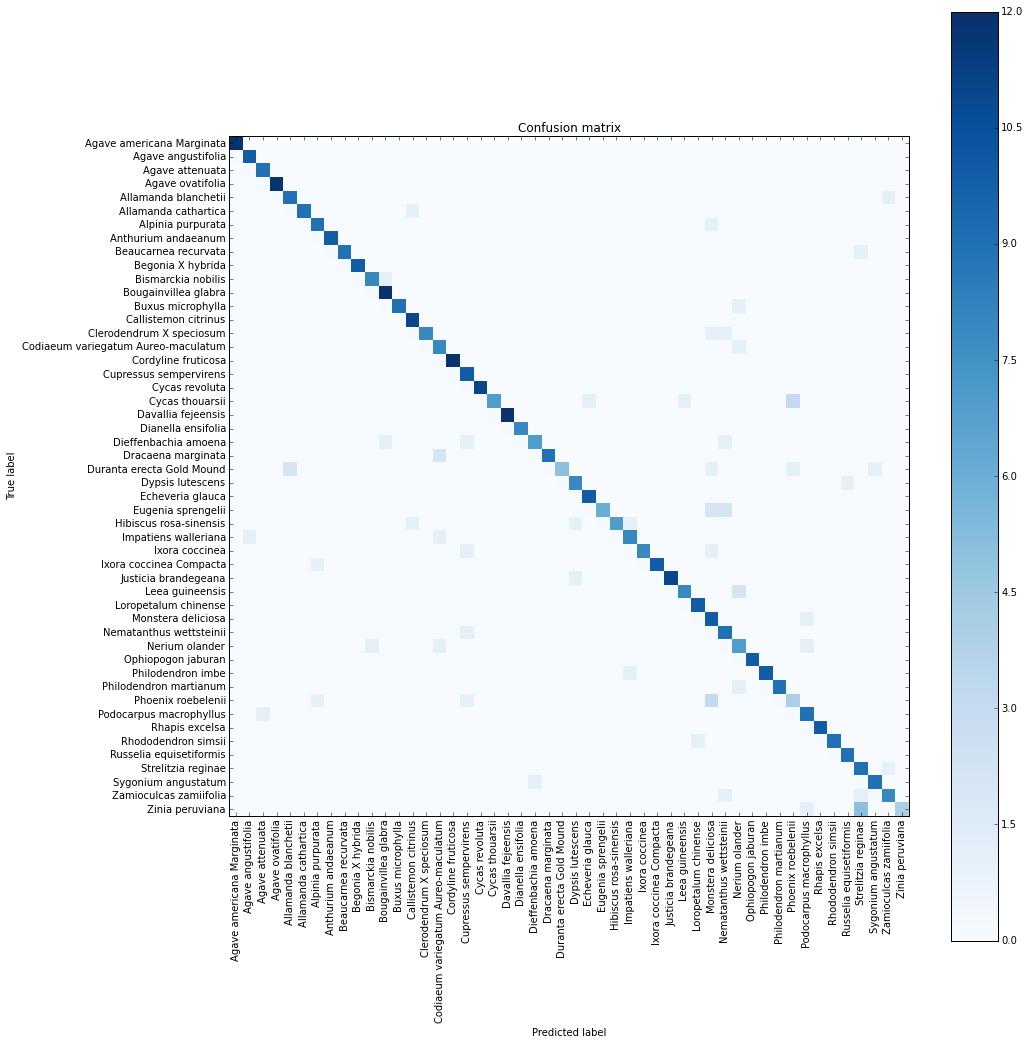

In [32]:
# Confusion Matrix
cm = sklm.confusion_matrix(true, pred_top_1)

# Resize plots
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# Plot Conf Mat function
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='None', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, title='Confusion matrix')
plt.show()

Normalized confusion matrix
[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.   1.   0.  ...,  0.   0.   0. ]
 [ 0.   0.   1.  ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.9  0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.8  0. ]
 [ 0.   0.   0.  ...,  0.   0.   0.4]]


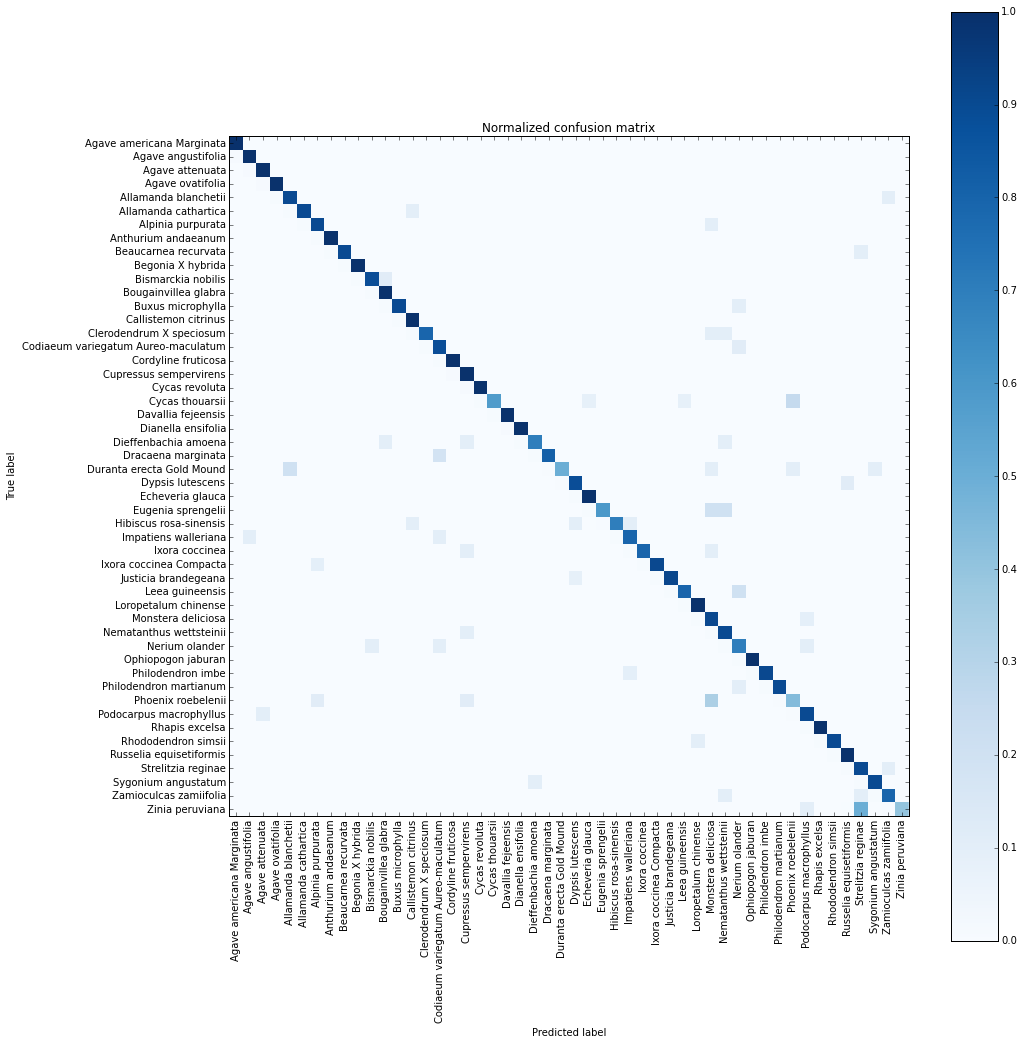

In [33]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [34]:
print(sklm.precision_recall_fscore_support(true, pred_top_1, average='weighted'))
print(sklm.accuracy_score(true, pred_top_1))
print(sklm.classification_report(true, pred_top_1, target_names=labels))

(0.8986091693508429, 0.875, 0.87474175586985981, None)
0.875
                                     precision    recall  f1-score   support

          Agave americana Marginata       1.00      1.00      1.00        12
                 Agave angustifolia       0.91      1.00      0.95        10
                    Agave attenuata       0.90      1.00      0.95         9
                   Agave ovatifolia       1.00      1.00      1.00        12
               Allamanda blanchetii       0.82      0.90      0.86        10
               Allamanda cathartica       1.00      0.90      0.95        10
                  Alpinia purpurata       0.82      0.90      0.86        10
                Anthurium andaeanum       1.00      1.00      1.00        10
               Beaucarnea recurvata       1.00      0.90      0.95        10
                  Begonia X hybrida       1.00      1.00      1.00        10
                 Bismarckia nobilis       0.89      0.89      0.89         9
              